In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.datasets import load_breast_cancer, make_classification

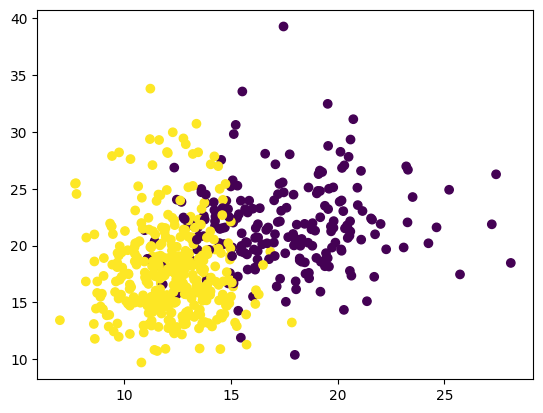

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
class AdaBoost:
  def __init__(self, n_estiamators = 50, lr = 0.1):
    self.n_estimators = n_estiamators
    self.lr = lr
    self.estimators = []
    self.alphas = []
    self.indices = {}

  def update_weights(self,weights, y_sample, y_pred, alpha):
    for i in range(len(y_sample)):
      if y_sample[i] != y_pred[i]:
        weights[i] *= np.exp(alpha)
      else:
        weights[i] *= np.exp(-alpha)

    weights /= np.sum(weights)
    upper = np.cumsum(weights)
    lower = upper - weights

    idx = np.searchsorted(upper, np.random.rand(y_sample.shape[0]))
    return idx

  def getindex(self, lower, upper, n_samples):
    # print(weights)
    return upper, lower

  def fit(self, X_train, y_train):
    n_samples, n_features = X_train.shape
    y_train = np.where(y_train > 0, 1, -1)
    weights = np.ones(n_samples) / n_samples
    X_sample = X_train
    y_sample = y_train

    for _ in range(self.n_estimators):
      dt = DecisionTreeClassifier(max_depth=1)
      dt.fit(X_sample, y_sample, sample_weight=weights)
      y_pred = dt.predict(X_sample)
      error = 1 - accuracy_score(y_sample, y_pred)
      if(error < 1e-5):
        print("Early Stop at iteration :", _ + 1)
        break
      alpha = 0.5*np.log((1 - error) / error)
      self.alphas.append(alpha)
      self.estimators.append(dt)

      idx = self.update_weights(weights, y_sample, y_pred, alpha)
      # print(idx)
      X_sample = X_train[idx]
      y_sample = y_train[idx]

    print(self.alphas)

  def predict(self, X_test):
    n_samples, n_features = X_test.shape
    y_pred = np.zeros(n_samples)
    for alpha, dt in zip(self.alphas, self.estimators):
      y_pred += self.lr * alpha *dt.predict(X_test)
    return np.where(y_pred > 0, 1, 0)

[1.2271759907330135, 0.9049122383128467, 0.8869623007960102, 1.1835618070658083, 1.1561469535605031, 1.4016801904532672, 1.4440271298779008, 1.290818138123276, 0.8608654324337857, 0.8869623007960102, 1.0024886903711474, 1.104747334964017, 1.0130800875334496, 1.1172017902889868, 1.0024886903711474, 0.8869623007960102, 1.0688060872673522, 1.1696995330583808, 1.0925368797768535, 1.4440271298779008, 1.2581361545331102, 1.5142610481884915, 1.7249937729157936, 1.4440271298779008, 1.8043315601285674, 1.3622897515267103, 2.1576317092571013, 1.7249937729157936, 1.9515471873419212, 2.3625864891913957, 2.0794415416798375, 1.8489646448169266, 1.8489646448169266, 2.3625864891913957, 2.0794415416798375, 1.8043315601285674, 1.7249937729157936, 2.2499048351651343, 2.2499048351651343, 2.011558526466865, 2.3625864891913957, 2.0794415416798375, 2.0794415416798375, 2.3625864891913957, 1.5947807185997132, 2.2499048351651343, 1.9515471873419212, 1.9515471873419212, 1.6893622629050484, 1.8489646448169266]
0.

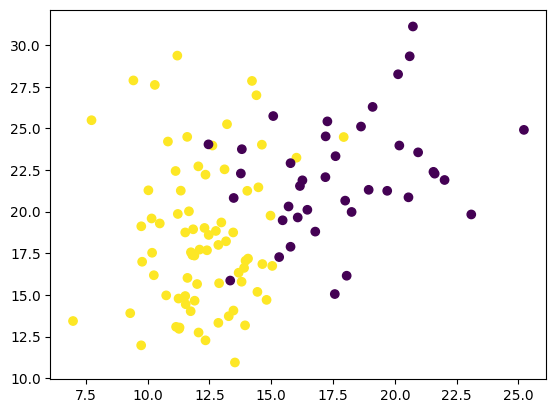

In [ ]:
md = AdaBoost()
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()